In [13]:
# Data Preprocessing

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
training_dataset = pd.read_csv('datasets/Google_Stock_Price_Train.csv')
training_dataset.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [15]:
X = training_dataset.iloc[:, 1:2].values
X

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

In [16]:
# min-max scalar to normalize the values in X from 0 to 1
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler(feature_range=(0,1))
scaled_X = mms.fit_transform(X)
scaled_X

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [18]:
X_train = []
y_train = []

for i in range(60, 1258):
    X_train.append(scaled_X[i-60:i, 0])
    y_train.append(scaled_X[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)


In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()
# 1st layer
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2)) 
# 2nd layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 
# 3rd layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2)) 
# 4th layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2)) 
# Last layer output
regressor.add(Dense(units=1))


c:\Users\Jamal Arshad\miniconda3\envs\env_ai\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [28]:
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 19s 107ms/step - loss: 0.0359
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0064
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - loss: 0.0065
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0061
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - loss: 0.0047
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - loss: 0.0050
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0042
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - loss: 0.0045
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - loss: 0.0045
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - loss: 0.0040
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 111ms/step - loss: 0.0040
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - loss: 0.0047
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.0039
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms

In [38]:
testing_dataset= pd.read_csv('datasets\Google_Stock_Price_Test.csv')
real_stock_price = testing_dataset.iloc[:, 1:2].values

In [39]:
dataset_total = pd.concat((training_dataset['Open'], testing_dataset['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testing_dataset) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = mms.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = mms.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


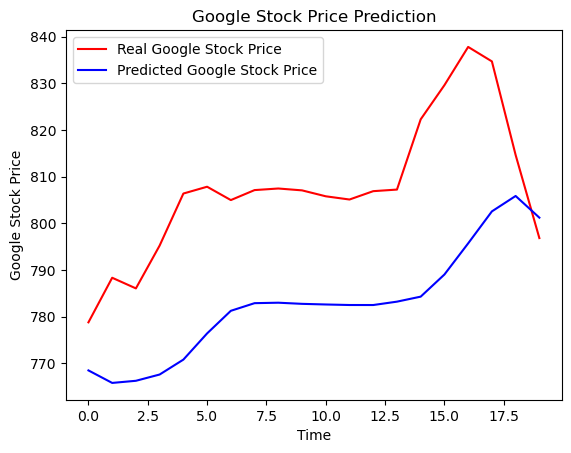

In [40]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()